# Imports

In [70]:
import cv2
import os
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from skimage import exposure
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dense

In [4]:
# Define the path to the folders containing the cat and dog images
Pituitary_dir = "Training/pituitary/"
Glioma_dir = "Training/glioma/"
NoTumor_dir = "Training/no_tumor/"
meningioma_dir="Training/meningioma/"

Pituitary_Valdir = "Validation/pituitary/"
Glioma_Valdir = "Validation/glioma/"
NoTumor_Valdir = "Validation/no_tumor/"
meningioma_Valdir="Validation/meningioma/"

Pituitary_Testdir = "Testing/pituitary/"
Glioma_Testdir = "Testing/glioma/"
NoTumor_Testdir = "Testing/no_tumor/"
meningioma_Testdir="Testing/meningioma/"

def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg"):
            img = cv2.imread(os.path.join(folder, filename))
            if img is not None:
                img = cv2.resize(img, (img_size, img_size))
                images.append(img)
               
    return images


In [5]:
# Define the size of the images
img_size = 128
# Load the Brain Tumor images
Pituitary_images= load_images(Pituitary_dir)
Glioma_images= load_images(Glioma_dir)
NoTumor_images= load_images(NoTumor_dir)
Meningioma_images= load_images(meningioma_dir)
Pituitary_testimages= load_images(Pituitary_Testdir)
Glioma_testimages= load_images(Glioma_Testdir)
NoTumor_testimages= load_images(NoTumor_Testdir)
Meningioma_testimages= load_images(meningioma_Testdir)
Pituitary_valimages= load_images(Pituitary_Valdir)
Glioma_valimages= load_images(Glioma_Valdir)
NoTumor_valimages= load_images(NoTumor_Valdir)
Meningioma_valimages= load_images(meningioma_Valdir)

In [6]:
train_images = np.concatenate([Pituitary_images,Glioma_images,NoTumor_images,Meningioma_images])

test_images = np.concatenate([Pituitary_testimages,Glioma_testimages,NoTumor_testimages,Meningioma_testimages])

val_images = np.concatenate([Pituitary_valimages,Glioma_valimages,NoTumor_valimages,Meningioma_valimages])


# Scale the pixel values to be between 0 and 1
# train_images = train_images / 255.0
# test_images = test_images / 255.0
train_images.shape,test_images.shape,val_images.shape

((12168, 128, 128, 3), (1705, 128, 128, 3), (834, 128, 128, 3))

In [7]:
train_dir="Training/"
test_dir="Testing/"
Val_dir="Validation/"

def labels(folder):
    labels=[]
    for label in os.listdir(folder):
        for image in os.listdir(folder+label):
                labels.append(label)
    return labels
train_labels=labels(train_dir)
test_labels=labels(test_dir)
val_labels=labels(Val_dir)   

In [8]:
y_train=np.array(train_labels)
y_test=np.array(test_labels)
y_val=np.array(val_labels)
y_train.shape,y_test.shape,y_val.shape

((12168,), (1705,), (834,))

In [23]:

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform class labels to encoded labels
encoded_labels_test = label_encoder.fit_transform(y_test)
encoded_labels_train= label_encoder.fit_transform(y_train)
encoded_labels_val= label_encoder.fit_transform(y_val)


# print(encoded_labels_test,encoded_labels_train,encoded_labels_val)



In [10]:
from keras.utils import to_categorical
# Convert target array to categorical format
train_labels2 = to_categorical(encoded_labels_train, num_classes=4)
test_labels2 = to_categorical(encoded_labels_test, num_classes=4)
val_labels2 = to_categorical(encoded_labels_val, num_classes=4)
# Print the converted categorical target
test_labels2.shape,train_labels2.shape,val_labels2.shape

((1705, 4), (12168, 4), (834, 4))

# PreProcessing  and Data Cleaning

1)Resizing

2)Converting to Grey Scale

3)Normalization



In [ ]:
def process_images(image):
    images = []
    for img in image:
        gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Normalize the image using min-max scaling
        normalized_image = exposure.rescale_intensity(gray_image, in_range='image', out_range=(0, 1))
        images.append(normalized_image)
               
    return images

In [ ]:
def augment_image(image):
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8,1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8,1.2))
    image = np.array(image)/255.0
    return image

In [ ]:

# Alternatively, you can normalize the image using z-score normalization
mean = np.mean(image)
std = np.std(image)
normalized_image = (image - mean) / std


In [ ]:
process_images(train_images)

# Data Representation

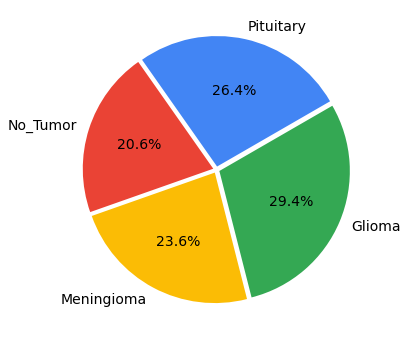

In [43]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie([len([x for x in train_labels if x=='pituitary']),
         len([x for x in train_labels if x=='no_tumor']),
         len([x for x in train_labels if x=='meningioma']),
         len([x for x in train_labels if x=='glioma'])],
        labels=['Pituitary','No_Tumor', 'Meningioma', 'Glioma'],
        colors=colors, autopct='%.1f%%', explode=(0.025,0.025,0.025,0.025),
        startangle=30);

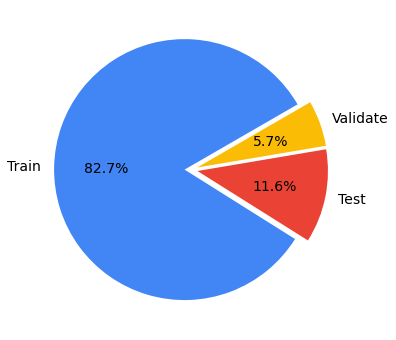

In [45]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']
plt.rcParams.update({'font.size': 14})
plt.pie([len(train_labels), len(test_labels),len(val_labels)],
        labels=['Train','Test','Validate'],
        colors=colors, autopct='%.1f%%', explode=(0.05,0.05,0.05),
        startangle=30);

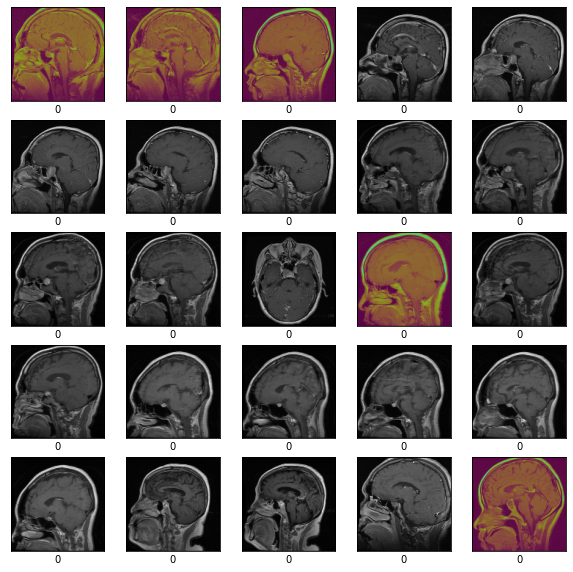

In [18]:
class_names = [str(i) for i in range(4)]
# Plot the first 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[encoded_labels_train[i]])
plt.show()

#  3 Classifiers

# DNN

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Define the DNN architecture
model = Sequential()
model.add(Flatten(input_shape=(128,128,3)))
model.add(Dense(52,activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels2, epochs=5, batch_size=5, validation_data=(val_images, val_labels2))

# Evaluate the model
loss, accuracy1 = model.evaluate(test_images, test_labels2)

# Make predictions
predictions = model.predict(test_images)


Epoch 1/5
2434/2434 [==============================] - 54s 22ms/step - loss: 20.4066 - accuracy: 0.3028 - val_loss: 1.3860 - val_accuracy: 0.2722
Epoch 2/5
2434/2434 [==============================] - 54s 22ms/step - loss: 1.3783 - accuracy: 0.2936 - val_loss: 1.3903 - val_accuracy: 0.2722
Epoch 3/5
2434/2434 [==============================] - 54s 22ms/step - loss: 1.3784 - accuracy: 0.2936 - val_loss: 1.3894 - val_accuracy: 0.2722
Epoch 4/5
2434/2434 [==============================] - 54s 22ms/step - loss: 1.3785 - accuracy: 0.2936 - val_loss: 1.3869 - val_accuracy: 0.2722
Epoch 5/5
54/54 [==============================] - 0s 4ms/step


In [ ]:
predictions = model.predict(test_images)
predictions

In [ ]:
predicted_classes = np.argmax(predictions, axis=1)

# Convert the true labels from one-hot encoded format to class labels
true_classes = np.argmax(test_labels2, axis=1)

# Generate the classification report
report = classification_report(true_classes, predicted_classes)

# Print the classification report
print(report)

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([0, 1])
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Customized CNN

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Define the CNN model
def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Conv2D(32, Filter, activation=activation, input_shape=(128, 128, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation=activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation=activation))
    model.add(Dense(4, activation='softmax'))
    model.compile(optimizer=optimizer, loss='category_crossentropy', metrics=['accuracy'])
    return model

# Create the KerasClassifier object
model = KerasClassifier(build_fn=create_model)

# Define the parameter grid
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'sigmoid'],
    'filter':[(3,3),(2,2),(4,4)]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(train_images, train_labels2)

# Print the best parameters found during the grid search
print("Best parameters: ", grid_search.best_params_)

# Print the best score found during the grid search
print("Best score: ", grid_search.best_score_)


In [52]:
# Create a sequential model
model = Sequential()
# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
# Add fully connected layers with softmax activation for categorical classification
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()
# Compile the model with categorical crossentropy loss and appropriate optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(train_images,train_labels2, epochs=8,validation_data=(val_images, val_labels2))
    
# Evaluate the model
loss, accuracy = model.evaluate(test_images, test_labels2)
print("Test accuracy:", accuracy)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 57600)             0         
                                                                 
 dense_28 (Dense)            (None, 128)             

In [53]:
predictions = model.predict(test_images)
predictions

54/54 [==============================] - 13s 195ms/step


array([[1.8593067e-01, 7.2637433e-01, 4.0637605e-02, 4.7057353e-02],
       [9.9616611e-01, 3.3021616e-04, 5.7270972e-04, 2.9309385e-03],
       [9.9999928e-01, 4.0288502e-12, 2.3265999e-10, 7.0167084e-07],
       ...,
       [1.9984113e-04, 9.8566534e-03, 1.6964760e-02, 9.7297871e-01],
       [3.3922261e-05, 9.1617584e-04, 4.9881517e-05, 9.9900001e-01],
       [1.1131664e-05, 3.8995963e-04, 2.8964212e-05, 9.9956995e-01]],
      dtype=float32)

In [54]:
predicted_classes = np.argmax(predictions, axis=1)

# Convert the true labels from one-hot encoded format to class labels
true_classes = np.argmax(test_labels2, axis=1)

# Generate the classification report
report = classification_report(true_classes, predicted_classes)
cm = confusion_matrix(true_classes, predicted_classes)

# Print the classification report
print(report,cm)

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       400
           1       0.90      0.51      0.65       421
           2       0.84      0.83      0.84       510
           3       0.65      0.93      0.76       374

    accuracy                           0.78      1705
   macro avg       0.80      0.78      0.77      1705
weighted avg       0.81      0.78      0.77      1705



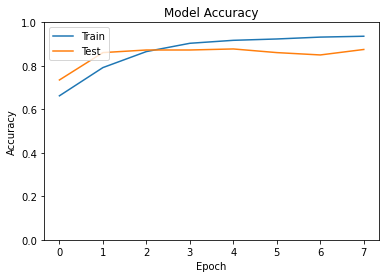

In [55]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([0, 1])
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

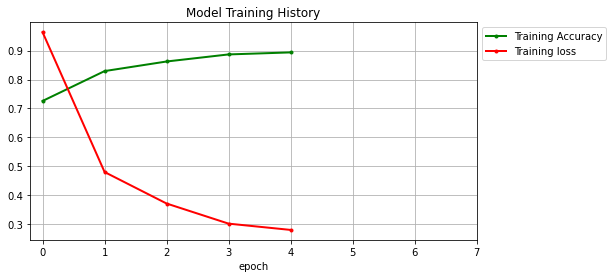

In [61]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(8)])
plt.legend(['Training Accuracy', 'Training loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Fine-Tuned CNN

1) Model(1) ResNet50

2) Model(2) ResNet101

3) Model (3) DenseNet121

4) Model(4) DenseNet169

5) Model(5) AssemblyNet


Model(1) ResNet50

In [58]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load the pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Create a new model and add the ResNet50 base model
model = Sequential()
model.add(base_model)

# Add additional layers on top of the base model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax')) 

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_7 (Flatten)         (None, 32768)             0         
                                                                 
 dense_30 (Dense)            (None, 256)               8388864   
                                                                 
 dense_31 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 31,977,604
Trainable params: 31,924,484
Non-trainable params: 53,120
_________________________________________________________________


In [59]:
# Train your model using your own dataset
batch_size=24
steps = int(len(train_images)/batch_size)
history=model.fit(train_images, train_labels2, epochs=5, steps_per_epoch=steps,validation_data=(val_images, val_labels2))

# Evaluate the model
loss, ResNet50_accuracy = model.evaluate(test_images, test_labels2)
print("Test accuracy:", ResNet50_accuracy)

Epoch 1/5
507/507 [==============================] - 1511s 3s/step - loss: 0.9634 - accuracy: 0.7261 - val_loss: 0.8884 - val_accuracy: 0.7338
Epoch 2/5
507/507 [==============================] - 931s 2s/step - loss: 0.4805 - accuracy: 0.8292 - val_loss: 0.5370 - val_accuracy: 0.8285
Epoch 3/5
507/507 [==============================] - 923s 2s/step - loss: 0.3717 - accuracy: 0.8623 - val_loss: 0.8791 - val_accuracy: 0.8537
Epoch 4/5
507/507 [==============================] - 1233s 2s/step - loss: 0.3023 - accuracy: 0.8868 - val_loss: 0.3722 - val_accuracy: 0.9017
Epoch 5/5
54/54 [==============================] - 30s 523ms/step - loss: 1.1415 - accuracy: 0.8199
Test accuracy: 0.8199413418769836


In [62]:
predictions = model.predict(test_images)
predictions

54/54 [==============================] - 30s 494ms/step


array([[9.9994159e-01, 9.6082609e-08, 1.1305067e-06, 5.7233137e-05],
       [9.9999094e-01, 2.6100378e-07, 1.5473323e-06, 7.2558560e-06],
       [9.9996591e-01, 1.3480200e-09, 1.3279890e-06, 3.2815784e-05],
       ...,
       [1.6226026e-04, 2.0249077e-04, 9.1894171e-06, 9.9962604e-01],
       [1.5233949e-01, 1.3996876e-02, 2.1441570e-03, 8.3151954e-01],
       [2.2993872e-02, 5.2721135e-02, 7.2639487e-03, 9.1702098e-01]],
      dtype=float32)

In [63]:
predicted_classes = np.argmax(predictions, axis=1)

# Convert the true labels from one-hot encoded format to class labels
true_classes = np.argmax(test_labels2, axis=1)

# Generate the classification report
report = classification_report(true_classes, predicted_classes)
cm = confusion_matrix(true_classes, predicted_classes)
# Print the classification report
print(report,cm)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       400
           1       0.93      0.74      0.82       421
           2       0.85      0.75      0.80       510
           3       0.65      0.93      0.76       374

    accuracy                           0.82      1705
   macro avg       0.84      0.83      0.82      1705
weighted avg       0.84      0.82      0.82      1705



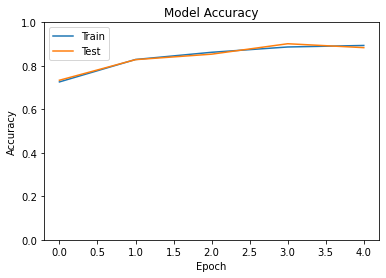

In [64]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([0, 1])
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

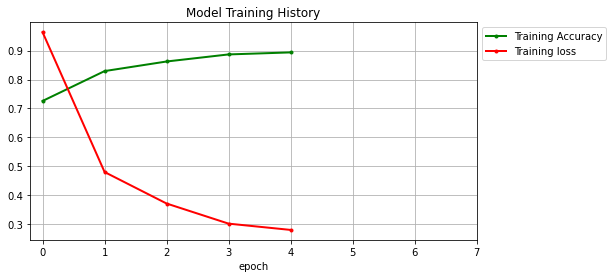

In [65]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(4)])
plt.legend(['Training Accuracy', 'Training loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Model (2) ResNet101

In [ ]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load the pre-trained ResNet101 model without the top layer
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Create a new model and add the ResNet101 base model
model = Sequential()
model.add(base_model)

# Add additional layers on top of the base model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax')) 

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


In [ ]:
steps = int(len(train_images)/batch_size)
# Train your model using your own dataset
model.fit(train_images, train_labels2, epochs=5,steps_per_epoch=steps,validation_data=(val_images, val_labels2))

# Evaluate the model
loss, ResNet101_accuracy = model.evaluate(test_images, test_labels2)
print("Test accuracy:", ResNet101_accuracy)

In [ ]:
predictions = model.predict(test_images)
predictions

In [ ]:
predicted_classes = np.argmax(predictions, axis=1)

# Convert the true labels from one-hot encoded format to class labels
true_classes = np.argmax(test_labels2, axis=1)

# Generate the classification report
report = classification_report(true_classes, predicted_classes)
cm = confusion_matrix(true_classes, predicted_classes)
# Print the classification report
print(report,cm)

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([0, 1])
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(4)])
plt.legend(['Training Accuracy', 'Training loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Model(4) DenseNet121

In [85]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load DenseNet-121 pre-trained on ImageNet without the top classification layer
base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(128, 128, 3))

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
                             

# Add a fully connected layer with 256 units and ReLU activation
x = Dense(256, activation='relu')(x)

# Add a classification layer with the number of classes
predictions = Dense(4, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_10 (ZeroPadding  (None, 134, 134, 3)  0          ['input_7[0][0]']                
 2D)                                                                                              
                                                                                                  
 conv1/conv (Conv2D)            (None, 64, 64, 64)   9408        ['zero_padding2d_10[0][0]']      
                                                                                            

 conv2_block4_1_conv (Conv2D)   (None, 32, 32, 128)  20480       ['conv2_block4_0_relu[0][0]']    
                                                                                                  
 conv2_block4_1_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv2_block4_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block4_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv2_block4_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block4_2_conv (Conv2D)   (None, 32, 32, 32)   36864       ['conv2_block4_1_relu[0][0]']    
                                                                                                  
 conv2_blo

                                                                                                  
 conv3_block2_1_conv (Conv2D)   (None, 16, 16, 128)  20480       ['conv3_block2_0_relu[0][0]']    
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv3_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, 16, 16, 128)  0          ['conv3_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 16, 16, 32)   36864       ['conv3_block2_1_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv3_block6_2_conv (Conv2D)   (None, 16, 16, 32)   36864       ['conv3_block6_1_relu[0][0]']    
                                                                                                  
 conv3_block6_concat (Concatena  (None, 16, 16, 320)  0          ['conv3_block5_concat[0][0]',    
 te)                                                              'conv3_block6_2_conv[0][0]']    
                                                                                                  
 conv3_block7_0_bn (BatchNormal  (None, 16, 16, 320)  1280       ['conv3_block6_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_blo

 conv3_block11_0_bn (BatchNorma  (None, 16, 16, 448)  1792       ['conv3_block10_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv3_block11_0_relu (Activati  (None, 16, 16, 448)  0          ['conv3_block11_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv3_block11_1_conv (Conv2D)  (None, 16, 16, 128)  57344       ['conv3_block11_0_relu[0][0]']   
                                                                                                  
 conv3_block11_1_bn (BatchNorma  (None, 16, 16, 128)  512        ['conv3_block11_1_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block3_0_bn (BatchNormal  (None, 8, 8, 320)   1280        ['conv4_block2_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block3_0_relu (Activatio  (None, 8, 8, 320)   0           ['conv4_block3_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, 8, 8, 128)    40960       ['conv4_block3_0_relu[0][0]']    
                                                                                                  
 conv4_block3_1_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv4_block3_1_conv[0][0]']    
 ization) 

 conv4_block7_1_conv (Conv2D)   (None, 8, 8, 128)    57344       ['conv4_block7_0_relu[0][0]']    
                                                                                                  
 conv4_block7_1_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv4_block7_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_1_relu (Activatio  (None, 8, 8, 128)   0           ['conv4_block7_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block7_2_conv (Conv2D)   (None, 8, 8, 32)     36864       ['conv4_block7_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 8, 8, 32)     36864       ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_concat (Concaten  (None, 8, 8, 608)   0           ['conv4_block10_concat[0][0]',   
 ate)                                                             'conv4_block11_2_conv[0][0]']   
                                                                                                  
 conv4_block12_0_bn (BatchNorma  (None, 8, 8, 608)   2432        ['conv4_block11_concat[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block12_0_relu (Activati  (None, 8, 8, 608)   0           ['conv4_block12_0_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv4_block16_0_relu (Activati  (None, 8, 8, 736)   0           ['conv4_block16_0_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_1_conv (Conv2D)  (None, 8, 8, 128)    94208       ['conv4_block16_0_relu[0][0]']   
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, 8, 8, 128)   512         ['conv4_block16_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 conv4_block20_1_bn (BatchNorma  (None, 8, 8, 128)   512         ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_1_relu (Activati  (None, 8, 8, 128)   0           ['conv4_block20_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, 8, 8, 32)     36864       ['conv4_block20_1_relu[0][0]']   
                                                                                                  
 conv4_block20_concat (Concaten  (None, 8, 8, 896)   0           ['conv4_block19_concat[0][0]',   
 ate)                                                             'conv4_block20_2_conv[0][0]']   
          

                                                                                                  
 conv4_block24_concat (Concaten  (None, 8, 8, 1024)  0           ['conv4_block23_concat[0][0]',   
 ate)                                                             'conv4_block24_2_conv[0][0]']   
                                                                                                  
 pool4_bn (BatchNormalization)  (None, 8, 8, 1024)   4096        ['conv4_block24_concat[0][0]']   
                                                                                                  
 pool4_relu (Activation)        (None, 8, 8, 1024)   0           ['pool4_bn[0][0]']               
                                                                                                  
 pool4_conv (Conv2D)            (None, 8, 8, 512)    524288      ['pool4_relu[0][0]']             
                                                                                                  
 pool4_poo

 conv5_block4_2_conv (Conv2D)   (None, 4, 4, 32)     36864       ['conv5_block4_1_relu[0][0]']    
                                                                                                  
 conv5_block4_concat (Concatena  (None, 4, 4, 640)   0           ['conv5_block3_concat[0][0]',    
 te)                                                              'conv5_block4_2_conv[0][0]']    
                                                                                                  
 conv5_block5_0_bn (BatchNormal  (None, 4, 4, 640)   2560        ['conv5_block4_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block5_0_relu (Activatio  (None, 4, 4, 640)   0           ['conv5_block5_0_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv5_block9_0_relu (Activatio  (None, 4, 4, 768)   0           ['conv5_block9_0_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block9_1_conv (Conv2D)   (None, 4, 4, 128)    98304       ['conv5_block9_0_relu[0][0]']    
                                                                                                  
 conv5_block9_1_bn (BatchNormal  (None, 4, 4, 128)   512         ['conv5_block9_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block9_1_relu (Activatio  (None, 4, 4, 128)   0           ['conv5_block9_1_bn[0][0]']      
 n)       

 lization)                                                                                        
                                                                                                  
 conv5_block13_1_relu (Activati  (None, 4, 4, 128)   0           ['conv5_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv5_block13_2_conv (Conv2D)  (None, 4, 4, 32)     36864       ['conv5_block13_1_relu[0][0]']   
                                                                                                  
 conv5_block13_concat (Concaten  (None, 4, 4, 928)   0           ['conv5_block12_concat[0][0]',   
 ate)                                                             'conv5_block13_2_conv[0][0]']   
                                                                                                  
 conv5_blo

In [ ]:
# steps = int(len(train_images)/batch_size)
# Train your model using your own dataset
model.fit(train_images, train_labels2, epochs=5,steps_per_epoch=steps,validation_data=(val_images, val_labels2))

# Evaluate the model
loss, DenseNet121_accuracy = model.evaluate(test_images, test_labels2)
print("Test accuracy:", DenseNet121_accuracy)

In [ ]:
predictions = model.predict(test_images)
predictions

In [ ]:
predicted_classes = np.argmax(predictions, axis=1)

# Convert the true labels from one-hot encoded format to class labels
true_classes = np.argmax(test_labels2, axis=1)

# Generate the classification report
report = classification_report(true_classes, predicted_classes)
cm = confusion_matrix(true_classes, predicted_classes)
# Print the classification report
print(report,cm)

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([0, 1])
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(4)])
plt.legend(['Training Accuracy', 'Training loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Model (4) DenseNet169

In [ ]:
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load the pre-trained DenseNet169 model without the top layer
base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Create a new model and add the DenseNet169 base model
model = Sequential()
model.add(base_model)

# Add additional layers on top of the base model
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax')) 

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


In [ ]:
steps = int(len(train_images)/batch_size)
# Train your model using your own dataset
history=model.fit(train_images, train_labels2, epochs=5,steps_per_epoch=steps,validation_data=(val_images, val_labels2))

# Evaluate the model
loss, DenseNet169_accuracy = model.evaluate(test_images, test_labels2)
print("Test accuracy:", DenseNet169_accuracy)

In [ ]:
predictions = model.predict(test_images)
predictions

In [ ]:
predicted_classes = np.argmax(predictions, axis=1)

# Convert the true labels from one-hot encoded format to class labels
true_classes = np.argmax(test_labels2, axis=1)

# Generate the classification report
report = classification_report(true_classes, predicted_classes)
cm = confusion_matrix(true_classes, predicted_classes)
# Print the classification report
print(report,cm)

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([0, 1])
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(4)])
plt.legend(['Training Accuracy', 'Training loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Model (5) Assembly Net

In [67]:
# Define the model architecture with different filter sizes and numbers
filter_sizes = [(32, (3, 3)), (64, (3, 3)), (128, (3, 3)), (32, (5, 5)), (64, (5, 5)), (128, (5, 5))]
for filter_size in filter_sizes:
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filter_size[0], filter_size[1], activation='relu', input_shape=(128,128, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(filter_size[0]*2, filter_size[1], activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(filter_size[0]*4, filter_size[1], activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Train the model
history = model.fit(train_images,train_labels2,batch_size=5, epochs=5, validation_data=(val_images,val_labels2))

# Evaluate the model on the test data
test_loss, AssemblyNet_acc = model.evaluate(test_images,test_labels2)
print('Test accuracy for filter size {}: {}'.format(filter_size, AssemblyNet_acc))

Epoch 1/5
2434/2434 [==============================] - 2209s 903ms/step - loss: 2.0259 - accuracy: 0.5996 - val_loss: 0.8030 - val_accuracy: 0.7170
Epoch 2/5
2434/2434 [==============================] - 2203s 905ms/step - loss: 0.7919 - accuracy: 0.7000 - val_loss: 0.6963 - val_accuracy: 0.7722
Epoch 3/5
2434/2434 [==============================] - 2214s 910ms/step - loss: 0.9112 - accuracy: 0.6474 - val_loss: 0.6892 - val_accuracy: 0.7566
Epoch 4/5
2434/2434 [==============================] - 2302s 946ms/step - loss: 0.6793 - accuracy: 0.7434 - val_loss: 0.6182 - val_accuracy: 0.7998
Epoch 5/5
54/54 [==============================] - 73s 1s/step - loss: 1.2181 - accuracy: 0.7062
Test accuracy for filter size (128, (5, 5)): 0.7061583399772644


In [68]:
predictions = model.predict(test_images)
predictions

54/54 [==============================] - 74s 1s/step


array([[9.0800440e-01, 8.6066319e-04, 4.9091331e-03, 8.6225830e-02],
       [4.0217346e-01, 1.4995824e-04, 2.5726917e-01, 3.4040740e-01],
       [1.0000000e+00, 3.1143341e-14, 1.1409521e-14, 1.3857330e-11],
       ...,
       [7.6940013e-03, 1.5654711e-01, 1.9616906e-02, 8.1614196e-01],
       [3.5491281e-03, 8.0307007e-02, 3.6020735e-03, 9.1254181e-01],
       [1.9576855e-02, 1.0889606e-01, 3.4627314e-03, 8.6806428e-01]],
      dtype=float32)

In [71]:
predicted_classes = np.argmax(predictions, axis=1)

# Convert the true labels from one-hot encoded format to class labels
true_classes = np.argmax(test_labels2, axis=1)

# Generate the classification report
report = classification_report(true_classes, predicted_classes)
cm = confusion_matrix(true_classes, predicted_classes)
# Print the classification report
print(report,cm)

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       400
           1       0.88      0.40      0.55       421
           2       0.78      0.82      0.80       510
           3       0.55      0.79      0.65       374

    accuracy                           0.71      1705
   macro avg       0.74      0.70      0.69      1705
weighted avg       0.74      0.71      0.70      1705
 [[322   2  20  56]
 [ 79 168  67 107]
 [  8   2 419  81]
 [ 26  19  34 295]]


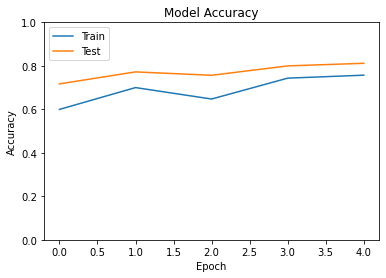

In [72]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([0, 1])
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

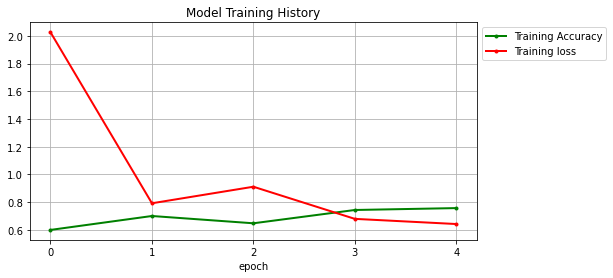

In [75]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(5)])
plt.legend(['Training Accuracy', 'Training loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Comparison between 3 classifiers

In [78]:
import pandas as pd

# Create a dictionary with data
data = {
    'Test_Accuracy': [accuracy1, accuracy, DenseNet121_accuracy,DenseNet169_accuracy,AssemblyNet_acc,ResNet50_accuracy,ResNet101_accuracy],
     
    'Other Evaluation Metrics':{'DNN':{'precision':{'Giloma':0.81,'Pituitary':0.90,'No_tumor':0.84,'Meningioma':0.65},
                                                    'Recall':{'Giloma':0.86,'Pituitary':0.51,'No_tumor':0.83,'Meningioma':0.93},
                                                    'f1_score':{'Giloma':0.84,'Pituitary':0.65,'No_tumor':0.84,'Meningioma':0.76}
                                            },
                                 
                                 'Customized_CNN':{'precision':{'Giloma':0.81,'Pituitary':0.90,'No_tumor':0.84,'Meningioma':0.65},
                                                    'Recall':{'Giloma':0.86,'Pituitary':0.51,'No_tumor':0.83,'Meningioma':0.93},
                                                    'f1_score':{'Giloma':0.84,'Pituitary':0.65,'No_tumor':0.84,'Meningioma':0.76}
                                            },
                                 'Fine_Tuned_CNN':{
                                     'ResNet50_Modle':{'precision':{'Giloma':0.93,'Pituitary':0.93,'No_tumor':0.85,'Meningioma':0.65},
                                                    'Recall':{'Giloma':0.89,'Pituitary':0.74,'No_tumor':0.75,'Meningioma':0.93},
                                                    'f1_score':{'Giloma':0.91,'Pituitary':0.82,'No_tumor':0.80,'Meningioma':0.76}
                                            },
                                     'ResNet101_Modle':{'precision':{'Giloma':0.93,'Pituitary':0.93,'No_tumor':0.85,'Meningioma':0.65},
                                                    'Recall':{'Giloma':0.89,'Pituitary':0.74,'No_tumor':0.75,'Meningioma':0.93},
                                                    'f1_score':{'Giloma':0.91,'Pituitary':0.82,'No_tumor':0.80,'Meningioma':0.76}
                                            },
                                      'DenseNet121_Model':{'precision':{'Giloma':0.81,'Pituitary':0.90,'No_tumor':0.84,'Meningioma':0.65},
                                                    'Recall':{'Giloma':0.86,'Pituitary':0.51,'No_tumor':0.83,'Meningioma':0.93},
                                                    'f1_score':{'Giloma':0.84,'Pituitary':0.65,'No_tumor':0.84,'Meningioma':0.76}
                                            },
                                     'DenseNet169_Modle':{'precision':{'Giloma':0.93,'Pituitary':0.93,'No_tumor':0.85,'Meningioma':0.65},
                                                    'Recall':{'Giloma':0.89,'Pituitary':0.74,'No_tumor':0.75,'Meningioma':0.93},
                                                    'f1_score':{'Giloma':0.91,'Pituitary':0.82,'No_tumor':0.80,'Meningioma':0.76}
                                            },
                                     'AssemblyNet_Model':{'precision':{'Giloma':0.81,'Pituitary':0.90,'No_tumor':0.84,'Meningioma':0.65},
                                                    'Recall':{'Giloma':0.86,'Pituitary':0.51,'No_tumor':0.83,'Meningioma':0.93},
                                                    'f1_score':{'Giloma':0.84,'Pituitary':0.65,'No_tumor':0.84,'Meningioma':0.76}
                                            }
                                 }
         
     }
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Print the DataFrame
df


,Other Evaluation Metrics
Customized_CNN,"{'precision': {'Giloma': 0.81, 'Pituitary': 0...."
DNN,"{'precision': {'Giloma': 0.81, 'Pituitary': 0...."
Fine_Tuned_CNN,{'ResNet50_Modle': {'precision': {'Giloma': 0....


In [ ]:
print("The best classifier was the Fine-tuned CNN model.")